In [28]:
import pygame
import os
import sys
import random
import cv2
import numpy as np
from keras.models import load_model

# Pygame 초기화
pygame.init()

# 화면 크기 설정
screen_width = 800
screen_height = 600
screen = pygame.display.set_mode((screen_width, screen_height))

# 플레이어 설정
player_size = 50
player_pos = [screen_width / 2, screen_height - player_size - 20]

# 총알 설정
bullet_size = 50
bullet_pos = [random.randrange(0, screen_width - bullet_size), 0]
bullet_list = [bullet_pos]

# 게임 속도
speed = 1

# Teachable Machine 모델 불러오기
model_path = "D:/models/game/game.h5"
assert os.path.exists(model_path), f"Model file not found at {model_path}"
model = load_model(model_path)


# 웹캠 설정
cap = cv2.VideoCapture(0)

# 움직임 속도
move_speed = 5

# 게임 루프
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    screen.fill((0, 0, 0))

    # 웹캠에서 이미지를 얻고, 모델에 입력으로 전달
    ret, frame = cap.read()
    if not ret:
        continue
    # 이미지 전처리 (여기서는 간단하게 크기만 조정했지만, 실제로는 더 복잡한 전처리가 필요할 수 있습니다)
    frame = cv2.resize(frame, (224, 224))  # 모델에 맞게 이미지 크기 조정
    frame = np.expand_dims(frame, axis=0)

    # 모델에 이미지를 입력하여 예측값을 얻음
    pred = model.predict(frame)
    class_idx = np.argmax(pred)

    # 분류된 클래스에 따라 플레이어 이동
    if class_idx == 1:  # 'left'
        player_pos[0] -= move_speed
    elif class_idx == 2:  # 'right'
        player_pos[0] += move_speed
    # 'hold'의 경우 아무런 동작도 수행하지 않음
    
    # 플레이어의 위치가 화면 밖으로 나가지 않도록 제한
    player_pos[0] = max(0, min(screen_width - player_size, player_pos[0]))

    # 플레이어 그리기
    pygame.draw.rect(screen, (0, 255, 0), (player_pos[0], player_pos[1], player_size, player_size))

    # 총알 속도 업데이트
    if bullet_pos[1] >= 0 and bullet_pos[1] < screen_height:
        bullet_pos[1] += speed
    else:
        bullet_pos[0] = random.randrange(0, screen_width - bullet_size)
        bullet_pos[1] = 0

    # 총알 그리기
    pygame.draw.rect(screen, (255, 0, 0), (bullet_pos[0], bullet_pos[1], bullet_size, bullet_size))

    # 총알이 플레이어를 맞추면 게임 오버
    if bullet_pos[1] >= player_pos[1] and bullet_pos[0] in range(int(player_pos[0]), int(player_pos[0] + player_size)):
        pygame.quit()
        sys.exit()

    pygame.display.update()

cap.release()
cv2.destroyAllWindows()

SystemExit: 

c:\Users\user\miniconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Why only left side?

In [2]:
# 모델에 이미지를 입력하여 예측값을 얻음
pred = model.predict(frame)
print("Prediction: ", pred)
class_idx = np.argmax(pred)
print("Class index: ", class_idx)

Prediction:  [[2.0491264e-06 9.9999702e-01 9.7383304e-07]]
Class index:  1


#### 걍 왼쪽밖에 인식 못하는듯?

In [2]:
import cv2
import numpy as np
from keras.models import load_model

# 모델 불러오기
model_path = "D:/models/game/keras_model.h5"
model = load_model(model_path)

# 웹캠 설정
cap = cv2.VideoCapture(0)

while True:
    # 웹캠에서 이미지를 얻고, 모델에 입력으로 전달
    ret, frame = cap.read()
    if not ret:
        break

    # 이미지 전처리
    frame = cv2.resize(frame, (224, 224))
    frame = np.expand_dims(frame, axis=0)

    # 모델에 이미지를 입력하여 예측값을 얻음
    pred = model.predict(frame)
    class_idx = np.argmax(pred)

    # 예측 클래스 출력
    if class_idx == 0:
        print("left")
    else :
        print("right")
    
cap.release()
cv2.destroyAllWindows()

left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left
left


KeyboardInterrupt: 

### my model sucks, change the model as mediapipe

In [8]:
# pip install BaseOptions
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
#@markdown We implemented some functions to visualize the gesture recognition results. <br/> Run the following cell to activate the functions.
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

import urllib

In [9]:

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
          hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
          ])

          mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

## Test

In [10]:
IMAGE_FILENAMES = ['thumbs_down.jpg', 'victory.jpg', 'thumbs_up.jpg', 'pointing_up.jpg']

for name in IMAGE_FILENAMES:
  url = f'https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/{name}'
  urllib.request.urlretrieve(url, name)

thumbs_down.jpg


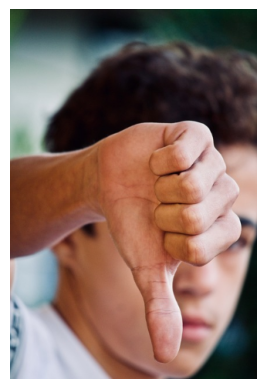

victory.jpg


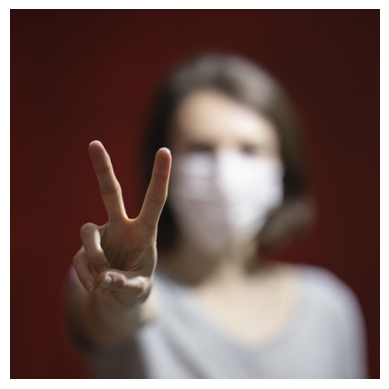

thumbs_up.jpg


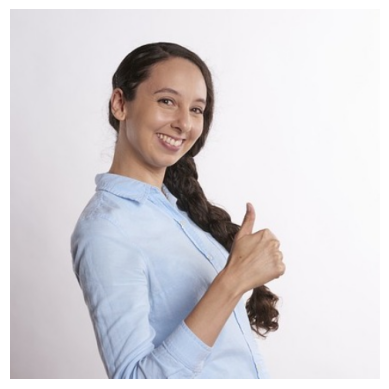

pointing_up.jpg


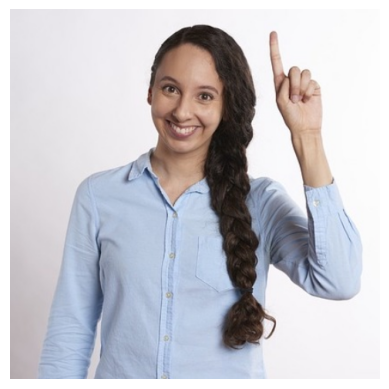

In [12]:
# from google.colab.patches import cv2_imshow
import cv2
import math
import matplotlib.pyplot as plt

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))

  # Convert the image from BGR to RGB color format
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  # Use plt.imshow() to show the image
  plt.imshow(img_rgb)
  plt.show()

# Preview the images.
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)

## 일단 img 인식은 not bad

## 렛츠 Apply

In [27]:
import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
GestureRecognizer = mp.tasks.vision.GestureRecognizer
GestureRecognizerOptions = mp.tasks.vision.GestureRecognizerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a gesture recognizer instance with the video mode:
options = GestureRecognizerOptions(
    base_options=BaseOptions(model_asset_path="D:/models/game/gesture_recognizer.task"),
    running_mode=VisionRunningMode.VIDEO)
with GestureRecognizer.create_from_options(options) as recognizer:
  # Pygame 초기화
  pygame.init()

  # 화면 크기 설정
  screen_width = 800
  screen_height = 600
  screen = pygame.display.set_mode((screen_width, screen_height))

  # 플레이어 설정
  player_size = 50
  player_pos = [screen_width / 2, screen_height - player_size - 20]

  # 총알 설정
  bullet_size = 50
  bullet_pos = [random.randrange(0, screen_width - bullet_size), 0]
  bullet_list = [bullet_pos]

  # 게임 속도
  speed = 1

  # Teachable Machine 모델 불러오기
  model_path = "D:/models/game/game.h5"
  assert os.path.exists(model_path), f"Model file not found at {model_path}"
  model = load_model(model_path)


  # 웹캠 설정
  cap = cv2.VideoCapture(0)

  # 움직임 속도
  move_speed = 5

  # 게임 루프
  while True:
      for event in pygame.event.get():
          if event.type == pygame.QUIT:
              pygame.quit()
              sys.exit()

      screen.fill((0, 0, 0))

      # 웹캠에서 이미지를 얻고, 모델에 입력으로 전달
      ret, frame = cap.read()
      if not ret:
          continue
      # 이미지 전처리 (여기서는 간단하게 크기만 조정했지만, 실제로는 더 복잡한 전처리가 필요할 수 있습니다)
      frame = cv2.resize(frame, (224, 224))  # 모델에 맞게 이미지 크기 조정
      frame = np.expand_dims(frame, axis=0)

      # 모델에 이미지를 입력하여 예측값을 얻음
      pred = model.predict(frame)
      class_idx = np.argmax(pred)

      # 분류된 클래스에 따라 플레이어 이동
      if class_idx == 0:  # 'left'
          player_pos[0] -= move_speed
      elif class_idx == 4:  # 'right'
          player_pos[0] += move_speed
      # 'hold'의 경우 아무런 동작도 수행하지 않음
      
      # 플레이어의 위치가 화면 밖으로 나가지 않도록 제한
      player_pos[0] = max(0, min(screen_width - player_size, player_pos[0]))

      # 플레이어 그리기
      pygame.draw.rect(screen, (0, 255, 0), (player_pos[0], player_pos[1], player_size, player_size))

      # 총알 속도 업데이트
      if bullet_pos[1] >= 0 and bullet_pos[1] < screen_height:
          bullet_pos[1] += speed
      else:
          bullet_pos[0] = random.randrange(0, screen_width - bullet_size)
          bullet_pos[1] = 0

      # 총알 그리기
      pygame.draw.rect(screen, (255, 0, 0), (bullet_pos[0], bullet_pos[1], bullet_size, bullet_size))

      # 총알이 플레이어를 맞추면 게임 오버
      if bullet_pos[1] >= player_pos[1] and bullet_pos[0] in range(int(player_pos[0]), int(player_pos[0] + player_size)):
          pygame.quit()
          sys.exit()

      pygame.display.update()

  cap.release()
  cv2.destroyAllWindows()
    

RuntimeError: Unable to open file at c:\Users\user\miniconda3\envs\gpu\lib\site-packages/D:\models\game\gesture_recognizer.task, errno=22

## fck error